# Proyecto 1 Etapa 1

# Trabajo en equipo (8%)

## Roles por integrante

* Daniel Felipe Vargas Ulloa - d.vargasu@uniandes.edu.co
  *   Rol: Lider de negocio



* Daniel Escalante Perez - d.escalante@uniandes.edu.co
  * Roles: Líder de datos y Líder de analítica

* Santiago Chamie Rey - s.chamie@uniandes.edu.co
  *   Rol: Lider de proyecto

## Tareas realizadas por integrante

* Daniel Felipe Vargas Ulloa - d.vargasu@uniandes.edu.co
  *   Tareas
    * Modelado y evaluación: Naive Bayes classifier
    * Entendimiento del negocio y enfoque analítico
    * Resultados Video


* Daniel Escalante Perez - d.escalante@uniandes.edu.co
  * Tareas
    * Modelado y evaluación: Logistic Regression
    * Mapa de actores relacionado con el producto de datos creado
    * Resultados Texto

* Santiago Chamie Rey - s.chamie@uniandes.edu.co
  *   Tareas:
      *  Entendimiento y preparación de los datos.
      *  Modelado y evaluación: Árbol de decisión

## Reflexión

El reto principal planteado por este proyecto fue aprender a aplicar los conceptos vistos sobre algoritmos de clasificación, a un tipo de clasificación particular, que es la clasificación de textos. Para esto nos tocó investigar maneras de preparar los datos para funcionar dentro de un esquema de clasificación además de buscar algoritmos nuevos que se adaptaran mejor a este tipo de ejercicio. Otro reto principal fue encontrar un modelo que pudieramos recomendarle a la empresa utilizar. Usando los algoritmos vistos en clase como KNN y árboles de decisión los resultados de las métricas no fueron los mejores, por lo que implementamos otro tipo de algoritmos, como el de regresión logística, el cual se usa comunmente para este tipo de clasificación. Otro reto que apareció fue el manejo de la RAM disponible por Google Colab, ya que, al estar trabajando en esta plataforma, tenemos una cantidad limitada de RAM para utiliza, y gracias al tamaño de los datos en este proyecto esta RAM se acababa. Para solucionar esto, al finalizar cada etapa del desarrollo borrabamos la variables que no se iban a volver a utilizar, así abriendo espacio para el código posterior.

Dentro de los miembros del grupo repartiríamos los 100 puntos equitativamente entre todos ya que sentimos que todos contribuimos de manera significativa en el desarrollo del proyecto y sin la ayuda de todos lo hubieramos logrado los resultados que obtuvimos. Por eso a cada uno le asignaríamos 33.33.. o 100/3 puntos. No nos parecería justo darle a alguno más que al resto debido a que todos contribuimos por igual.

Nuestra dinámica de grupo ha sido bastante buena durante el desarrollo del proyecto al igual que los laboratorios por lo que no tenemos quejas al respecto. Sin embargo, los puntos a mejorar y trabajar de ahora en adelante como grupo son la sincronización y la tranquilidad. Con respecto a la sincronización, cómo Google Colab no permite trabajar a dos personas a la vez sin crear conflictos de versión, tuvimos momentos donde alguien estaba trabajando y alguien más llegaba y creaba conflictos. Esto se solucionaría trabajando en intérvalos distintos o creando horarios de trabajo exclusivos. Con respecto a la tranquilidad, durante el desarrollo hubo varios momentos críticos donde el estrés a veces gana y lleva a tomar decisiones apuradas que pueden no ser las mejores.

## Reuniones



*   Reunión de lanzamiento y planeación [4:00 pm | Marzo 20, 2024] [2h]
*   Reunión de ideación [3:00 pm | Marzo 26, 2024] [30 min]
*   Reunión de seguimiento semana 1 [6:00 pm | Marzo 30, 2024] [1h]
*   Reunión de seguimiento semana 2 [6:00 pm | Abril 4, 2024] [30 min]
*   Reunión de finalización [6:00 pm | Abril 6, 2024] [30 min]



# Entendimiento y preparación de datos (20%)

## Importación de librerias y carga de datos

Antes de empezar el entendimiento de los datos debemos importar las librerías que utilizaremos durante el desarrollo de este proyecto.

In [1]:
!pip install -q --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [2]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install -q contractions
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install -q inflect
# Manejo de gráficas
!pip install -q scikit-plot
#YAYY
!pip install -q -U spacy
!pip install -q pandas
!python -m spacy download es_core_news_sm -q

# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 61.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install -q pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import tree
import sklearn as sklearn

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.7 MB/s eta 0:00:00


Con las librerías importadas hacemos la carga de los datos en un dataframe de pandas.

In [4]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('tipo1_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [5]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


## Entendimiento

Cómo los datos dados tienen tan pocas columnas, creamos una variable 'textos' con datos analíticos de estos con el fin de poderlos análizar.

In [6]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['Moda'] = [st.mode([len(x) for x in i.split(' ')])[0] for i in textos['Review']]
print(textos.describe())


             Class        Conteo          Max          Min         Moda
count  7875.000000   7875.000000  7875.000000  7875.000000  7875.000000
mean      3.491683    407.945016    13.211429     0.848254     2.323937
std       1.328275    434.744952     3.125050     0.507458     0.937780
min       1.000000     33.000000     7.000000     0.000000     0.000000
25%       2.000000    201.000000    11.000000     1.000000     2.000000
50%       4.000000    271.000000    13.000000     1.000000     2.000000
75%       5.000000    503.000000    14.000000     1.000000     2.000000
max       5.000000  14129.000000   125.000000     4.000000    11.000000


Podemos ver que existen valores muy atípicos, como palabras de 125 letras y reviews de 14000 palabras, que vale la pena revisar. A parte de esto, los valores promedio son importantes para tener en cuenta.

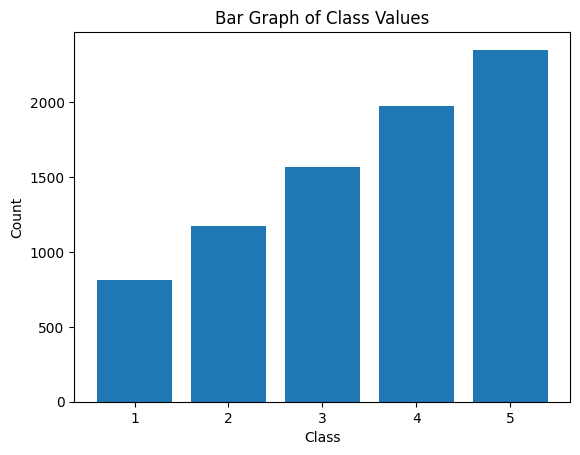

In [7]:
# Get the value counts for the 'Class' column
class_counts = data_t['Class'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Graph of Class Values')
plt.show()


Evidenciamos que es más común que existan reviews positivos que negativos. Esto puede llegar a ser importante con respecto a que un modelo podría llegar a tender a predecir valores de 5 ya que son los más comunes, a pesar de que las palabras digan lo contrario.

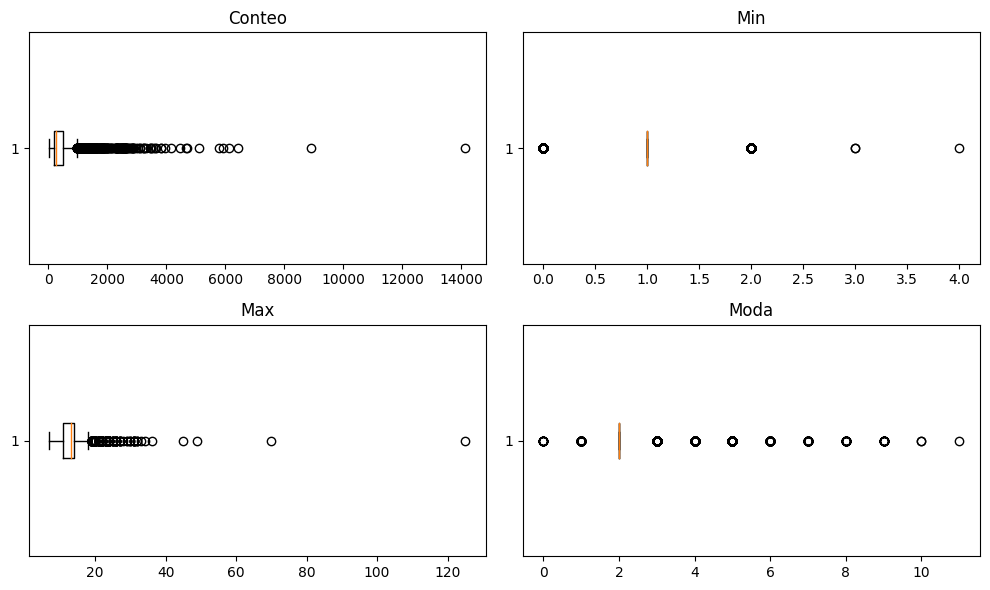

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Conteo
axes[0, 0].boxplot(textos['Conteo'], vert=False)
axes[0, 0].set_title('Conteo')

# Min
axes[0, 1].boxplot(textos['Min'], vert=False)
axes[0, 1].set_title('Min')

# Max
axes[1, 0].boxplot(textos['Max'], vert=False)
axes[1, 0].set_title('Max')

# Moda
axes[1, 1].boxplot(textos['Moda'], vert=False)
axes[1, 1].set_title('Moda')

plt.tight_layout()
plt.show()


In [9]:
# Validación de los reviews más extraños
print(textos.loc[textos['Conteo'].idxmax()]['Review'])

A nuestra llegada a Marival Residences nos tocó que estaban evacuando el hotel por lo del huracan patricia, lo cual no fuimos informados en el marival resort del cual acababamos de hacer chek-out y sabian que ibamos al residences para quedarnos 4 noches mas y celebrar nuestra boda; por lo cual nos toco llegar y regresarnos al resort ya que ahi tenian un salón seguro para pasar el huracan, estuvimos ahi desde las 12pm hasta las 10pm que afortunadamente no paso a mayores y nos pudieron entregar la habitación, cabe mencionar que mientras estuvimos ahi recibimos un excelente trato de la gerente del hotel la cual nos estuvo informando cada noticia y tranquilizandonos, hizo un excelente trabajo!!!, habia alimentos para todos y bebidas suficientes, lo unico que teniamos que hacer unas interminables filas para comer y cenar y en mi estado de embarazo en el que iba fue algo dificil, y más al llegar al hotel cuando nos entregaron la habitación nos informaron que durante esa noche y al día siguie

In [10]:
print(textos.loc[textos['Max'].idxmax()]['Review'])

Es un hotel que en relación a su costo no ofrece una estadía que ofrezca un viaje placentero. Las habitaciones son viejas y tienen humedad. El personal no es muy servicial y amable. La calidad de la comida no es buena en relación con su precio. Lo único bueno es el bar y piscina de la torre del mar..........................................................................................................................


In [11]:
print(textos.loc[textos['Min'].idxmax()]['Review'])

buen lugar, pero demasiado caro para comer comida mexicana.


In [12]:
print(textos.loc[textos['Moda'].idxmax()]['Review'])

La mejor experiencia de la historia precolombina y la importancia del oro como una interesante informacion sobre las comunidades indigenas colombianas


Con estos dos ejemplos podemos corroborar que aunque los Reviews sean atípicos tienen información válida. El caso de la palabras de 125 letras fue que se le fueron muchos puntos, que serían eliminados con la ejecución de los algoritmos, y el de 14000 palabras seguía siendo válido además de muy completo. Con el proceso de preparación de datos estos valores atípicos podrían llegar a reducirse con la eliminación de stopwords entre otras cosas.

## Preparación

### Limpieza

Para empezar a preparar los datos debemos: eliminar los valores no ascii, poner todas las palabras en minúscula, eliminar la puntuación, reemplazar los números por palabras y eliminar las stopwords.

In [13]:
stop_words_spanish = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') if word is not None else None for word in words]

def to_lowercase(words):
    return [word.lower() for word in words]

def remove_punctuation(words):
    return [re.sub(r'[^\w\s]', '', word) if word is not None else None for word in words]

def replace_numbers(words):
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in words if not any(char.isdigit() for char in word)]

def remove_stopwords(words):
    return [word for word in words if word not in stop_words_spanish]

def remove_accidentals(words):
    replacements = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'}
    return [''.join(replacements[char] if char in replacements else char for char in word) for word in words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

La función preprocessing nos sirve de referencia ya que esta hace el proceso de eliminar el ruido de los datos y dejar unicamente las palabras clave. Este será útil a la hora de tokenizar, tanto en el desarrollo de los algoritmos y predecir el puntaje de los datos, como a la hora de construir el pipeline.

### Tokenización

En el proceso de tokenización haremos una lista con las palabras resultado de las transformaciones anteriores, para poder aplicar el proceso de lematización.

In [14]:
data_t['Review'] = data_t['Review'].apply(contractions.fix)
data_t['words'] = data_t['Review'].apply(word_tokenize)

In [15]:
data_t['words'].dropna()
data_t.shape

(7875, 3)

In [16]:
data_t['words']=data_t['words'].apply(preprocessing)
print(data_t.head())

                                              Review  Class  \
0  Nos alojamos en una casa alquilada en la ciuda...      4   
1  La comida está bien, pero nada especial. Yo te...      3   
2  En mi opinión, no es una como muchos usuarios ...      3   
3  esta curiosa forma que asemeja una silla de mo...      4   
4  Lo mejor era la limonada. Me gusto la comida d...      2   

                                               words  
0  [alojamos, casa, alquilada, ciudad, amurallada...  
1  [comida, bien, , especial, , tenia, mejor, com...  
2  [opinion, , usuarios, reclaman, , gran, palada...  
3  [curiosa, forma, asemeja, silla, montar, ahi, ...  
4  [mejor, limonada, , gusto, comida, mundo, sosa...  


### Normalización

Para la normalización decidimos utilizar lematización ya que da una versión de las palabras generales, más representativas de lo que dan utilizando stemming. Con solo el uso del lematizador podemos garantizar que los verbos se pondrán en su forma infinitiva y el resto de palabras en su forma neutral.

In [17]:
import spacy

lemmatizer = spacy.load("es_core_news_sm")

def lemmatize_verbs(words):
    #Lemmatize verbs in list of tokenized words
    doc = lemmatizer(" ".join(words))
    return [token.lemma_ for token in doc]

data_t['words'] = data_t['words'].apply(lemmatize_verbs)

### Selección de campos

Con las palabras ya lematizadas unimos las listas nuevamente para poder eliminar espacios y las tíldes restantes para garantizar la homogeneidad de los datos.

In [18]:
data_t['words'] = data_t['words'].apply(remove_accidentals)

In [19]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
print(data_t.head())

                                              Review  Class  \
0  Nos alojamos en una casa alquilada en la ciuda...      4   
1  La comida está bien, pero nada especial. Yo te...      3   
2  En mi opinión, no es una como muchos usuarios ...      3   
3  esta curiosa forma que asemeja una silla de mo...      4   
4  Lo mejor era la limonada. Me gusto la comida d...      2   

                                               words  
0  alojamo casa alquilado ciudad amurallado   par...  
1  comida bien   especial   tenia mejor comida me...  
2  opinion   usuario reclamar   gran paladar pare...  
3  curioso forma asemejo silla montar ahi nombre ...  
4       mejor limonado   gusto comida mundo sos frio  


In [20]:
# Elimminamos los espacios extra entre las palabras
import re

for index, row in data_t.iterrows():
  data_t.loc[index, 'words'] = re.sub(r'\s+', ' ', row['words'])

Acá podemos ver una comparación entre el texto base y el resultado de aplicar las transformaciones. Podemos observar que los verbos están en su infinitivo, las palabras con género se neutralizaron y los plurales.

In [21]:
print(data_t['Review'][0])
print(data_t['words'][0])

Nos alojamos en una casa alquilada en la ciudad amurallada. Parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes, tiendas y vida nocturna. Gran lugar para un grupo con intereses variados, no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos. Asegúrate de aventurarse fuera de la ciudad, pero algunos también es un gran lugar para alojarse
alojamo casa alquilado ciudad amurallado parecia tanto seguro cualquiera gran ciudad monton buen restaurante tienda vida nocturno gran lugar grupo interes variado seguro traer nino aqui solo hacer asegurate aventurar el ciudad tambien gran lugar alojar el


In [22]:
textos2 = data_t.copy()
textos2['Conteo'] = [len(x) for x in textos2['words']]
textos2['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos2['words']]
textos2['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos2['words']]
textos2['Moda'] = [st.mode([len(x) for x in i.split(' ')])[0] for i in textos2['words']]
print(textos2.describe())

             Class       Conteo          Max          Min         Moda
count  7875.000000  7875.000000  7875.000000  7875.000000  7875.000000
mean      3.491683   262.485079    11.891048     2.532190     5.456254
std       1.328275   274.164755     2.093100     1.038049     1.158928
min       1.000000    26.000000     6.000000     0.000000     0.000000
25%       2.000000   129.000000    11.000000     2.000000     5.000000
50%       4.000000   178.000000    12.000000     2.000000     5.000000
75%       5.000000   326.000000    13.000000     3.000000     6.000000
max       5.000000  8741.000000    30.000000     7.000000    12.000000


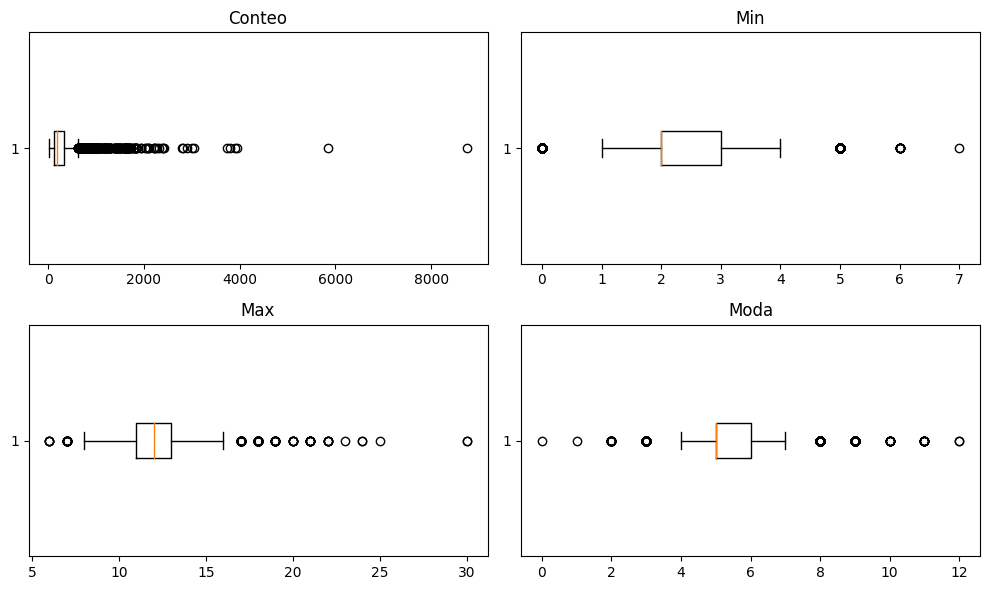

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Conteo
axes[0, 0].boxplot(textos2['Conteo'], vert=False)
axes[0, 0].set_title('Conteo')

# Min
axes[0, 1].boxplot(textos2['Min'], vert=False)
axes[0, 1].set_title('Min')

# Max
axes[1, 0].boxplot(textos2['Max'], vert=False)
axes[1, 0].set_title('Max')

# Moda
axes[1, 1].boxplot(textos2['Moda'], vert=False)
axes[1, 1].set_title('Moda')

plt.tight_layout()
plt.show()


In [24]:
X_data, y_data = data_t['words'],data_t['Class']
y_data

0       4
1       3
2       3
3       4
4       2
       ..
7870    3
7871    3
7872    5
7873    5
7874    3
Name: Class, Length: 7875, dtype: int64

Basado en la información anterior podemos ver que la distribución de los datos es mucho menor ya después de haberse hecho la transformación.

In [25]:
count = CountVectorizer()
X_count = count.fit_transform(X_data)
print(X_count.shape)
X_count.toarray()[0]

(7875, 20870)


array([0, 0, 0, ..., 0, 0, 0])

Utilizamos la función TfiidfVectorizer para encontrar los valores Tf-idf para cada palabra. El primer valor de las parejas representa el id del Review y la segunda el id de la palabra. Continúan con el valor de tf-idf para esas parejas.

In [26]:
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(X_data)
print(X_tf_idf.shape)

(7875, 20870)


Podemos concluir que hay 7875 documentos con 20870 palabras diferentes.

In [27]:
# Imprime los valores TF-IDF para las palabras del primer documento
index_to_word = {idx: word for word, idx in tf_idf.vocabulary_.items()}

first_document_tfidf = X_tf_idf[0].toarray().flatten()
for idx, tfidf_value in enumerate(first_document_tfidf):
    if tfidf_value != 0:
        word = index_to_word[idx]
        print(f"Word: {word}, TF-IDF value: {tfidf_value}")

Word: alojamo, TF-IDF value: 0.1629329563023252
Word: alojar, TF-IDF value: 0.1737071688593814
Word: alquilado, TF-IDF value: 0.27364829260328877
Word: amurallado, TF-IDF value: 0.1747638663449037
Word: aqui, TF-IDF value: 0.12396982275153426
Word: asegurate, TF-IDF value: 0.206387100568409
Word: aventurar, TF-IDF value: 0.24444233044446728
Word: buen, TF-IDF value: 0.07638645150114975
Word: casa, TF-IDF value: 0.1393904255831274
Word: ciudad, TF-IDF value: 0.3011509761934237
Word: cualquiera, TF-IDF value: 0.13550529472149156
Word: el, TF-IDF value: 0.1714510133715839
Word: gran, TF-IDF value: 0.32748652095689845
Word: grupo, TF-IDF value: 0.1470987255793981
Word: hacer, TF-IDF value: 0.08224033998383815
Word: interes, TF-IDF value: 0.24780060432664708
Word: lugar, TF-IDF value: 0.14810708421641006
Word: monton, TF-IDF value: 0.1419712433237551
Word: nino, TF-IDF value: 0.14222829408420243
Word: nocturno, TF-IDF value: 0.19189278502536902
Word: parecia, TF-IDF value: 0.166594664182685

In [28]:
data_prep = X_tf_idf.copy().todense()

In [29]:
data_prep = pd.DataFrame(data_prep, columns=tf_idf.vocabulary_.keys())

In [30]:
data_prep.columns

Index(['alojamo', 'casa', 'alquilado', 'ciudad', 'amurallado', 'parecia',
       'tanto', 'seguro', 'cualquiera', 'gran',
       ...
       'panquequ', 'vagabundear', 'acompanir', 'mannequen', 'cabezar',
       'urbanasu', 'congestionamieto', 'caminador', 'grafiti', 'remonto'],
      dtype='object', length=20870)

In [31]:
data_prep["Class"] = y_data

In [32]:
data_prep.columns

Index(['alojamo', 'casa', 'alquilado', 'ciudad', 'amurallado', 'parecia',
       'tanto', 'seguro', 'cualquiera', 'gran',
       ...
       'vagabundear', 'acompanir', 'mannequen', 'cabezar', 'urbanasu',
       'congestionamieto', 'caminador', 'grafiti', 'remonto', 'Class'],
      dtype='object', length=20871)

In [33]:
data_prep.shape

(7875, 20871)

In [34]:
data_prep.duplicated().sum()

71

In [35]:
data_prep = data_prep.drop_duplicates()

Con esto termina la preparación de los datos, habiendo eliminado las filas duplicadas y creado la matriz TF-IDF con los valores resultado para cada palabra y documento.

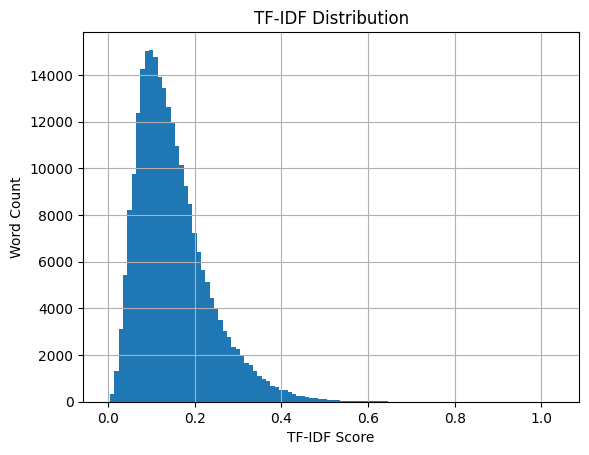

In [36]:
# Creamos un histograma para ver la distribución de valores tf_idf
tf_idf_scores = X_tf_idf.toarray()

tf_idf_scores_flat = tf_idf_scores.flatten()[tf_idf_scores.flatten() != 0]

bin_edges = np.arange(0, 1.05, 0.01)

hist, bins = np.histogram(tf_idf_scores_flat, bins=bin_edges)

plt.bar(bins[:-1], hist, width=0.01)
plt.xlabel('TF-IDF Score')
plt.ylabel('Word Count')
plt.title('TF-IDF Distribution')
plt.grid(True)
plt.show()


In [37]:
del tf_idf_scores_flat, bin_edges, hist, bins, X_tf_idf, tf_idf, data_t

In [38]:
data_prep.to_csv("datos_entregados_procesados.csv", index=False)

El histograma anterior nos sirve de referencia para antender como están distribuidos los valores TF-IDF de todos los documentos, especialmente el hecho de que la mayoría son menores a 0.2.

# Modelado y evaluación (20%)

## Algoritmo de árbol de decisión [Santiago Chamie Rey]

El algoritmo de árbol de decisión fue el único de los algoritmos de clasificación que utilizamos en el proyecto de los que vimos en clase. Los otros dos algoritmos utilizados son algunos de los más utilizados al clasificar textos, como se hace en este proyecto. No así, elegimos utilizar este algoritmo como un punto de partida y comparación de resultados, y familiarizarnos con el proceso de clasificar textos.

Este algoritmo funciona a partir de la subdivisión del conjunto de datos basado en las características particulares de los conjuntos. Los hiperparámetros de este algoritmo es la profundidad del árbol (que tantos subconjuntos se hacen) y las columnas de decisión. Para encontrar dónde dividir el árbol se hace el cálculo del coeficiente gini o entropía (dependiendo del que se elija) para cada una de las columnas de los datos, eligiendo la que tenga un valor más significativo. Este proceso se repite tantas veces lo permitan los datos y la profundidad del árbol para formar grupos característicos para cada calificación [0,5].

In [ ]:
Y=data_prep['Class']
X=data_prep.drop(['Class'], axis=1)

Para encontrar la profundidad adecuada del algoritmo se hace un proceso de búsqueda de grilla, utilizando una lista de valores plausibles de profundidad, lo cuales se computan para sacar algún coeficiente y compararlos entre sí. Ya con este coeficiente elegido se puede entonces crear el modelo final, dividiendo los datos en grupos 80-20 para entrenar el modelo y hacer pruebas respectivamente.

In [ ]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Definimos los parámetros sobre los que queremos realizar la búsqueda de grilla
param_grid = {
    'max_depth': [2000, 2061, 2250]  # Lista de valores de profundidad que queremos probar
}

# Creamos el objeto de árbol de decisión
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(estimator=arbol, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=1)

# Ejecutamos la búsqueda de grilla en los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtenemos los resultados de la búsqueda
print("Mejor profundidad encontrada:", grid_search.best_params_['max_depth'])
print("F1 score del mejor modelo encontrado:", grid_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejor profundidad encontrada: 2000
F1 score del mejor modelo encontrado: 0.3428473962398627


In [ ]:
# Entrenamos el modelo final con la mejor profundidad encontrada
best_depth = grid_search.best_params_['max_depth']
arbol_final = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=0)
arbol_final.fit(X_train, Y_train)

# Determinamos las predicciones del modelo final sobre el conjunto test.
y_pred_final = arbol_final.predict(X_test)

# Calculamos el F1 score del modelo final sobre el conjunto test
f1_final = f1_score(Y_test, y_pred_final, average='weighted')
print("F1 score del modelo final sobre el conjunto test:", f1_final)

F1 score del modelo final sobre el conjunto test: 0.33226325813748997


Al finalizar la construcción del modelo dió un resultado de 0.33 en el puntaje f1, métrica de evaluación elegida para este caso, y la siguiente matriz de confusión.

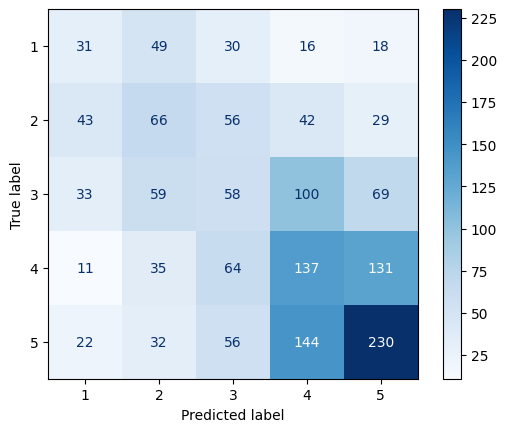

In [ ]:
# Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_final)
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred_final))

              precision    recall  f1-score   support

           1       0.22      0.22      0.22       144
           2       0.27      0.28      0.28       236
           3       0.22      0.18      0.20       319
           4       0.31      0.36      0.34       378
           5       0.48      0.48      0.48       484

    accuracy                           0.33      1561
   macro avg       0.30      0.30      0.30      1561
weighted avg       0.33      0.33      0.33      1561



In [ ]:
del X, Y, param_grid, arbol, grid_search, best_depth, arbol_final, y_pred_final

El modelo entrenado tuvo un puntaje f1 de 0.33, logrando un máximo f1 para predecir los puntajes de 5 en las reseñas, lo que tiene sentido ya que este es el puntaje más común. Este modelo logra ser satisfactorio para predecir los puntajes, sin embargo, sigue faltándole la certeza esperada para poder recomendárselo al negocio.

## Naive Bayes classifier (Clasificador bayesiano) [Daniel Vargas Ulloa]

### Descripción del Algoritmo:

El algoritmo de Naive Bayes Classifier es un método de clasificación probabilístico basado en el teorema de Bayes con una suposición ingenua (de ahí su nombre "naive"). Este clasificador se utiliza comúnmente en tareas de clasificación, incluido el procesamiento de lenguaje natural (PLN).

#### **Funcionamiento del algoritmo**

El algoritmo de Naive Bayes utiliza el teorema de Bayes para calcular la probabilidad condicional de que una instancia pertenezca a una determinada clase dada la presencia de ciertas características. En nuestro caso, este algoritmo nos permitirá asignarle una claificación a una reseña a partir de las palabras que esta contenga.

El teorema de Bayes es una regla fundamental en la teoría de la probabilidad que permite calcular la probabilidad condicional de un evento dado el conocimiento de otro evento relacionado. Formalmente, el teorema de Bayes establece que la probabilidad de que ocurra un evento A dado que ha ocurrido un evento B. Se puede calcular utilizando la fórmula:



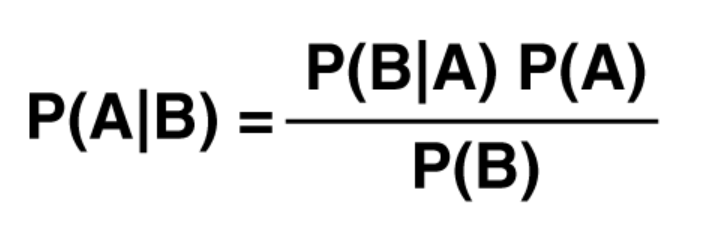

Donde:

* P(A∣B) es la probabilidad condicional de que ocurra el evento A dado que ha ocurrido el evento B.

* P(B∣A) es la probabilidad condicional de que ocurra el evento B dado que ha ocurrido el evento A.

* P(A) y P(B) son las probabilidades de que ocurran los eventos A y B respectivamente.

En el contexto del algoritmo de Naive Bayes, esta fórmula se utiliza para calcular la probabilidad condicional de pertenencia a una clase dada la presencia de ciertas características (predictores).


El algoritmo de Naive Bayes utiliza el teorema de Bayes para calcular la probabilidad condicional de que una instancia pertenezca a una determinada clase dada la presencia de ciertas características.

Supongamos que tenemos un conjunto de datos con características (variables predictoras, en nuestro caso estas siendo palabras) $X_1, X_2, ..., X_n$ y una clase objetivo $C$ (en nuestro caso la clase objetivo siendo el valor de la calificación del 1 al 5). El objetivo es predecir la clase de una nueva instancia utilizando las características observadas.

El algoritmo calcula la probabilidad de que una instancia pertenezca a cada clase $C_i$ utilizando la fórmula del teorema de Bayes:

$\
P(C_i | X_1, X_2, ..., X_n) = \frac{P(X_1, X_2, ..., X_n | C_i) \times P(C_i)}{P(X_1, X_2, ..., X_n)}
\$

Donde:
*  P(C_i | X_1, X_2, ..., X_n)  es la probabilidad condicional de que una instancia pertenezca a la clase C_i dado que tiene características X_1, X_2, ..., X_n.
*  P(X_1, X_2, ..., X_n | C_i)  es la probabilidad condicional de observar las características X_1, X_2, ..., X_n dado que la instancia pertenece a la clase C_i.
*  P(C_i)  es la probabilidad previa de que una instancia pertenezca a la clase C_i.
*  P(X_1, X_2, ..., X_n)  es la probabilidad total de observar las características X_1, X_2, ..., X_n, también conocida como probabilidad marginal.

El clasificador predice la clase $C_i$ que maximiza esta probabilidad condicional.

#### **Supuestos del algoritmo**

El supuesto clave del algoritmo de Naive Bayes es que las características son condicionalmente independientes dadas las clases. Es decir, la presencia de una característica en una clase no está relacionada con la presencia de otras características. Aunque esta suposición es simplista y a menudo poco realista, Naive Bayes sigue siendo efectivo en muchos casos prácticos.

#### **Ventajas y desventajas**

**Ventajas:**

* Simplicidad: Es fácil de implementar y entender.

* Eficiencia computacional: Requiere un tiempo de entrenamiento y predicción relativamente bajo.

* Buen rendimiento en conjuntos de datos grandes: A menudo supera a métodos más complejos cuando el conjunto de datos es grande y las suposiciones ingenuas no se violan significativamente.

**Desventajas:**

* Suposición de independencia condicional: Puede no ser realista en muchas situaciones del mundo real.

* Sensibilidad a características irrelevantes: Las características irrelevantes pueden afectar negativamente el rendimiento del clasificador.

* Mal manejo de datos faltantes: Puede conducir a estimaciones de probabilidad sesgadas si hay características faltantes en el conjunto de datos.

#### **Funcionamiento en PLN para la clasificación de reseñas**

Para nuestro problema de clasificación de reseñas, donde el objetivo es asignar una calificación a una reseña basada en su contenido, los pasos para aplicar el algoritmo de Naive Bayes para esta tarea son los siguientes:

* **Preprocesamiento de datos:** Se realiza la limpieza de texto, tokenización y eliminación de palabras irrelevantes o comunes (stop words).

* **Representación de características:** Cada reseña se representa como un vector de características que describe la presencia o ausencia de ciertas palabras en el texto.

* **Entrenamiento del modelo:** A partir de los datos procistos, se calculan las probabilidades de que una palabra aparezca en reseñas de cada clase de calificación (En este caso, calificaciones del 1 al 5 como vimos en el entendimiento de datos), asumiendo la independencia condicional de las palabras dadas las clases.

* **Predicción:** Dada una nueva reseña, el modelo utiliza el teorema de Bayes para calcular la probabilidad de que pertenezca a cada clase de calificación, y predice la clase con la probabilidad más alta.

* **Evaluación del modelo:** Se evalúa el rendimiento del modelo utilizando métricas como precisión, recall y F1-score en un conjunto de datos de prueba.

**Fuentes:**

IBM. (2023). What are naïve Bayes classifiers? https://www.ibm.com/topics/naive-bayes

Saritaş, M. M., & Yaşar, A. (2019). Performance Analysis of ANN and Naive Bayes Classification Algorithm for Data Classification. International Journal Of Intelligent Systems And Applications In Engineering, 7(2), 88-91. https://doi.org/10.18201/ijisae.2019252786

### Implementación:

Comenzamos por copiar el conjunto de datos a una nueva variable

In [ ]:
#Copia de los datos
data = data_prep.copy()

Separamos el conjunto se labels y de featues para posteriormente pasarselos de forma separada al algoritmo.

Tener un gran número de características irrelevantes puede tener un impacto negativo en el rendimiento del modelo, especialmente haciendo uso del algoritmo de Naive Bayes, que es sensible a un alto numero de caracteristicas irrelevantes. Estas características adicionales pueden introducir ruido en los datos, lo que dificulta que el modelo encuentre patrones significativos. Esto puede conducir a un sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y no puede generalizar bien a nuevos datos. Además, el aumento en la dimensionalidad debido a las características irrelevantes puede hacer que el modelo sea más complejo y aumentar el tiempo de entrenamiento y predicción. Por lo tanto, es importante eliminar características que no contribuyan significativamente a la tarea de clasificación para mejorar la precisión y la eficiencia del modelo. En este caso, al eliminar las características menos frecuentes e irrelevantes, estamos reduciendo la complejidad del modelo y eliminando el ruido de los datos, lo que debería mejorar su capacidad de generalización y rendimiento.







In [ ]:
# Imprimir el número de columnas en el conjunto de datos
print("Número de columnas en el conjunto de datos inicialmente:", len(data.columns))

# Eliminar las columnas menos relevantes
label = 'Class'
features = data.columns.to_list()
features.remove(label)

# Calcular el promedio de cada columna (excepto la etiqueta)
column_averages = data.drop(columns=label).mean()

# Ordenar las columnas por su promedio (de menor a mayor)
sorted_columns = column_averages.sort_values()

# Eliminar las columnas menos frecuentes e irrelevantes

# Calcular el número de columnas a eliminar (porcentaje)
percentage_to_drop = 0.05  #  eliminar el 5% de las características menos relevantes
num_columns_to_drop = int(len(column_averages) * percentage_to_drop)

columns_to_drop = sorted_columns.index[:num_columns_to_drop]  # Se elimina el 20% de columnas con los promedios más bajos
data.drop(columns=columns_to_drop, inplace=True)

# Eliminar filas con todos los valores iguales a 0 (excepto la columna de etiqueta)
data = data.loc[(data.drop(columns=label) != 0).any(axis=1)]

# Imprimir el número de columnas en el conjunto de datos
print("Número de columnas en el conjunto de datos despues de eliminar caracteristicas irrelevantes:", len(data.columns))




Número de columnas en el conjunto de datos inicialmente: 20871
Número de columnas en el conjunto de datos despues de eliminar caracteristicas irrelevantes: 19828


In [ ]:
#Identificación de la etiqueta y de las variables explicativas

label = 'Class'
features = data.columns.to_list()
features.remove(label)

Dado que una de las principales desventajas del algoritmo de Naive Bayes es su sensibilidad a caracteristicas irrelevantes, se consideró la posibilidad de eliminar los datos anomalos del conjunto de datos antes de entrenar el modelo, con el objetivo de reducir el numero de caracteristicas irrelevantes existentes. No obstante, se encontró que realizar este proceso tenia un efecto negativo sobre la calidad del modelo, por lo que tomó la decisión de evitar este paso.

In [ ]:
# # Eliminación de valores anómalos
# Q1 = data[features].quantile(0.25)
# Q3 = data[features].quantile(0.75)
# IQR = Q3 - Q1
# data = data[~((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

Generamos un conjunto de entrenamiento y un  conjunto de prueba para poder verificar la calidad del modelo posteriormente.

In [ ]:
# División del conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)

Inicializamos el clasificador de Naive Bayes usando la implementación de Gaussian Naive Bayes

In [ ]:
# Inicialización del clasificador Naive Bayes
naive_bayes_classifier = GaussianNB()

Aunque Naive Bayes no tiene hiperparámetros esenciales, uno de los hiperparámetros opcionales que puede ajustarse es var_smoothing, que controla la suavización de las probabilidades en el clasificador Naive Bayes Gaussiano. Esta técnica es útil para abordar el problema de cero frecuencia en los datos, donde ciertas características pueden tener una frecuencia de cero en una clase particular, lo que lleva a una probabilidad de cero para esa clase. El parámetro var_smoothing agrega un pequeño valor de suavizado a las varianzas de todas las características, evitando así la multiplicación de probabilidades por cero durante la estimación de la probabilidad. Buscar el mejor valor para var_smoothing mediante técnicas como la búsqueda en cuadrícula o la búsqueda aleatoria puede ayudar a encontrar un equilibrio óptimo entre la precisión y el sobreajuste del modelo, mejorando así la calidad general del modelo.








In [ ]:
# Definir los hiperparámetros a probar
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

Entrenamos el modelo haciendo uso del set de entrenamiento.

In [ ]:
# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(naive_bayes_classifier, parameters, cv=5)
grid_search.fit(x_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'var_smoothing': 1e-05}


Utilizamos el modelo para y comparamos las etiquetas provistas con las etiquetas asignadas por el modelo para calcular la calidad del modelo

In [ ]:
# Predicción en los conjuntos de entrenamiento y prueba
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

In [ ]:
# Métricas de predicción vs prueba
print("Métricas del conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))

Métricas del conjunto de entrenamiento:
              precision    recall  f1-score   support

           1       0.63      1.00      0.78       635
           2       0.78      0.94      0.85       912
           3       0.90      0.88      0.89      1223
           4       0.91      0.85      0.88      1576
           5       1.00      0.78      0.88      1897

    accuracy                           0.86      6243
   macro avg       0.85      0.89      0.86      6243
weighted avg       0.89      0.86      0.87      6243



In [ ]:
# Métricas de predicción vs prueba
print("Métricas del conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Métricas del conjunto de prueba:
              precision    recall  f1-score   support

           1       0.16      0.31      0.21       154
           2       0.27      0.38      0.31       248
           3       0.25      0.24      0.25       330
           4       0.31      0.24      0.27       387
           5       0.44      0.31      0.36       442

    accuracy                           0.29      1561
   macro avg       0.29      0.29      0.28      1561
weighted avg       0.31      0.29      0.29      1561



A pesar de los esfuerzos realizados en el modelado, los resultados obtenidos no alcanzan el nivel deseado de calidad. Si bien las métricas de precisión y recall son consistentes en su desempeño moderado, con valores oscilando entre 0.16 y 0.44 para la precisión y entre 0.24 y 0.38 para recall, respectivamente, el puntaje F1 general del modelo es de solo 0.29. Esto indica que el modelo no logra un equilibrio satisfactorio entre la precisión y el recall, lo que puede ser atribuido a una proporción desfavorable de falsos positivos y falsos negativos en las predicciones.

Un puntaje F1 de 0.29 sugiere que el modelo no está generalizando bien a través de las clases, lo que implica una capacidad limitada para clasificar correctamente las reseñas en las cinco categorías. Los falsos positivos representan las instancias incorrectamente clasificadas como positivas, mientras que los falsos negativos son las instancias incorrectamente clasificadas como negativas. En nuestro contexto de clasificación de reseñas, esto significa que el modelo está cometiendo errores tanto al sobrevalorar como al subvalorar las reseñas. En términos del negocio, esto podría traducirse en una experiencia insatisfactoria para aquellos interesados en el obtener información valiosa del modelo, como pueden ser las caracteristicas de un hotel que mas influyen en una review.

En última instancia, determinar si el modelo es adecuado para el negocio dependerá de qué tan cerca esté de calificar correctamente las reseñas en la escala de 1 a 5 (Dado que un modelo que incorrectamente asigna una calificación de 5 a una review etiquetada con un score de 1 seria completamente inutil para el negocio, mientras que un modelo que incorrectamente asigna un 4 en lugar de un 5 es un modelo que si tiene un entendimiento decente de como las caracteristicas afectan a la calificación final de una review). Para evaluar esto más a fondo, sería útil construir una matriz de confusión que muestre con claridad los errores de clasificación del modelo.

Dicho esto, generamos la matriz de confusión para visualizar la cantidad de aciertos y errores que tuvo el modelo al intentar etiquetar los datos

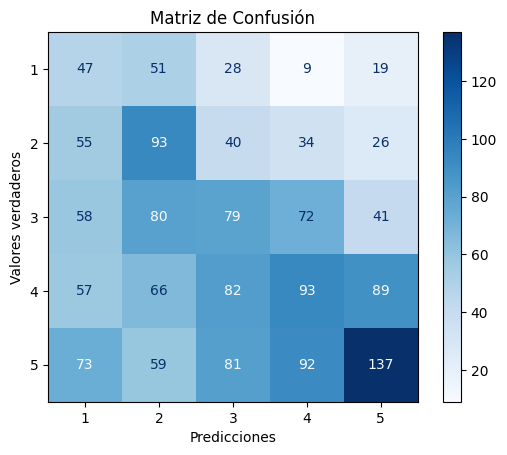

In [ ]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Configurar y mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()

A partir de la matriz de confusión, podemos observar que la mayoría de las reseñas clasificadas incorrectamente por el modelo están asignadas a valores cercanos al valor verdadero. Por ejemplo, si el valor verdadero de la reseña es 4 o 5, la mayoría de los errores del modelo tienden a estar en los valores 3 o 5, que son relativamente cercanos al valor correcto. Además, son relativamente pocos los errores que están considerablemente mal clasificados.

Sin embargo, existe una clara tendencia en la matriz de confusión hacia la sobrevaloración de las reseñas. Esto sugiere que el modelo tiende a identificar correctamente los elementos que contribuyen a una reseña positiva, pero tiene dificultades para identificar los aspectos negativos de una reseña. Esto es un factor crucial, ya que los stakeholders como los gerentes de hoteles están interesados en identificar las características específicas de sus hoteles que llevan a reseñas negativas para poder corregirlas. Por lo tanto, este modelo puede no proporcionarles a estos gerentes una comprensión completa de las áreas que necesitan mejorar para aumentar sus calificaciones.

In [ ]:
del data, features, naive_bayes_classifier, y_pred_train, y_pred_test

## Algoritmo de regresión logística [Daniel Escalante Perez]

### Descripción del Algoritmo:

La regresión logistica es un algoritmo de machine learning para la tarea de clasificación enfocada en la tarea de analitica predictiva. La regresión logistica es un ejemplar de aprendizaje supervisado. Lo que hace este algoritmo es predecir la probabilidad que un ejemplar de que ocurra un evento, en este caso de que se tome cierta clase o no se tome una clase.

Como suena, se puede ver que es un algoritmo para clases binarias, no obstante, se puede aplicar la tecnica OvR que significa One vs Rest que implica crear modelos por tantas clases se vayan a analizar. Ya con esto, en cada una se toma una clase diferente a analizar, y todas las demas clases se ponen en una clase nueva que sea "todas las que no son la seleccionada", de esta forma se pueden tener 2 clases solamente.

La regresión logistica se basa en el uso de la función sigmoidea:



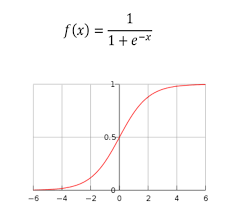


Esta función mapea cualquier valor real dentro de un rango de 0 a 1.

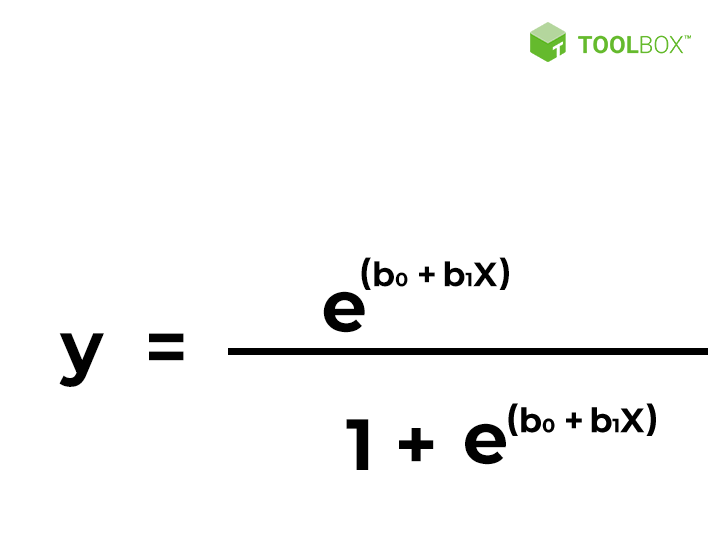

Ajustando el exponente negativo para que quede positivo. La formula de la regresión logistica es la que se ve en la imagen anterior. Lo que hace es tomar una formula similar a la de una regresión lineal con un bias (b0) y un coeficiente (b1). Esto se hace para relacionar linealmente la variable independiente con una variable x con la cual se calculara la probabilidad del evento positivo usando la función sigmoidea, la que el valor de x a uno entre 0 y 1. De esta manera cuando un mayor valor de una variable explicativa hace que se tome la clase positiva, entonces el coeficiente de esta variable explicativa sera positivo para hacer crecer la expresión lineal cuando incrementa la variable. Con esto en cuenta, si incrementa la expresión lineal, entonces el resultado de la función se acercara más a 1 por lo que tomara esta clase con mayor probabilidad. Lo que hace el algoritmo es tomar un umbral y si la probablidad cruza ese umbral asignara esa entrada a la clase positiva y de lo contrario asignara la negativa.

En el caso de OVR, las formulas sacaran las probabilidades, se tomara el modelo que diga que con mayor probabilidad que el resultado sera la clase positiva de ese modelo y se asignara la clase de ese modelo entre todos los del OVR.

Como se observó, es un algoritmo simple y ya con los coeficientes calculados en el entrenamiento se puede clasificar un nuevo dato facilmente haciendo la evaluación de la ecuación.

Para entrenar el algoritmo se buscan los b0 y b1 de todas las variables usando stochastic gradient descent y cross-entropy loss. Siendo el primero el metodo de optimización y el segundo la función de costo que se busca reducir para acercarse al resultado verdadero con la predicción.

Stochastic gradient descent prueba valores para los parametros iterativamente acercandose el optimo de la función de costo que mide el error entre las probabilidades calculadas y la clase verdadera del dato que se esta trabajando.

Para usar el modelo se tienen multiples supuestos como la no multicolinealidad entre las variables explicativas. Que los datos sean suficientes ya que el modelo se beneficia de muchas observaciones. Tambien, se deben evitar los atipicos extremos. Adicionalmente, las observaciones deben ser independientes entre si. Por ultimo, debe haber una relación lineal entre las variables y el logaritmo de (exitos/fallos).

Para medir el desempeño del modelo se utilizaran las metricas de los modelos de clasificación tales como lo son la precision, recall, f1-score, accuracy y la matriz de confusión.

Adicionalmente, usaremos los coeficientes proporcionados y hallados por el modelo para interpretar la solución y poder observar que variables afectan positivamente la selección de una clase.

Para la configuración de hiperparametros se deben configurar para el caso de scilearn el solver, penalty y el regularization strength. El solver es el algoritmo que se usa para resolver el problema de optimización. La penalidad es usada para evitar el sobreajuste y generalizar mejor el problema, con este podemos evitar que el modelo se haga muy complejo. Por ultimo, la regularization strength (C), se usa para evitar que el modelo sea tan complejo, entre más pequeño, más regulado esta el modelo, entre más alto se da más importancia a los datos de entrenamiento.

Para encontrar la mejor combinación de hiperparametros se usara la busqueda de hiperparametros con validación cruzada (Dividir los datos de entrenamiento y dejar aparte un pedazo, entrenar sobre el resto y evaluar sobre el pedazo y repetir cambiando el pedazo, sacando el promedio de las metricas de todas las pruebas). Esta va evaluar las combinaciones de hiperparametros con busqueda cruzada buscando la combinación que proporcione las mejores metricas promedio de la evaluación cruzada.

Para usar el modelo se tienen multiples supuestos como la no multicolinealidad entre las variables explicativas. Que los datos sean suficientes ya que el modelo se beneficia de muchas observaciones. Tambien, se deben evitar los atipicos extremos. Adicionalmente, las observaciones deben ser independientes entre si. Por ultimo, debe haber una relación lineal entre las variables y el logaritmo de (exitos/fallos). Algo recomendable es que el set de datos sea linealmente separable.

Para verificar si un dataset sea linealmente separable se puede entrenar un Perceptron (algoritmo de clasificación) y si los datos son linealmente separables, el algoritmo encontrará un hiperplano en un numero finito de iteraciones.

#### Fuentes:


*   https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/
*   https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn
*   https://rukshanpramoditha.medium.com/logistic-regression-for-multiclass-classification-3-strategies-you-need-to-know-0a3e74574b96
*   https://web.stanford.edu/~jurafsky/slp3/5.pdf
*   https://medium.com/@Coursesteach/deep-learning-part-7-6e78057a9ca6
*   https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
*   https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html#:~:text=The%20Perceptron%20was%20arguably%20the,%2C%20it%20will%20loop%20forever.)
*   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html



In [ ]:
#Copia de los datos
data = data_prep.copy()

In [ ]:
#Identificación de la etiqueta y de las variables explicativas

label = 'Class'
features = data.columns.to_list()
features.remove(label)

In [ ]:
data['Class'].value_counts()

Class
5    2339
4    1963
3    1553
2    1160
1     789
Name: count, dtype: int64

In [ ]:
data.isnull().any(axis=0).sum()

0

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[features].duplicated().sum()

0

In [ ]:
data.shape

(7804, 20871)

### Implementación

Se va a asumir la independencia y no multicolinealidad entre las variables explicativas ya que entre palabras los casos son muy pocos, adicionalmente, ocurren en conectores o palabras comunes que probablemente se hayan retirado en la preparación. Tambien sacar la correlación entre cada una de las más de 20000 variables es computacionalmente costoso. Adicionalmente, luego de haberlo intentado se ve que se borra información importante y se pierde calidad del modelo. Por esto el proceso de borrar variables correlacionadas queda comentado.

In [ ]:
#Sacamos el mapa de correlación pero solo tomando como 1 los mayores a 0.6 en valor absoluto
#minimun = 0.6
#plt.figure(figsize=(12, 10))
#columns_heatmap = features.copy()
#map = data[columns_heatmap].corr().abs().applymap(lambda x: 0 if (x < minimun) else 1)

In [ ]:
#Sacar un arreglo de tuplas con las columnas correlacionadas
#correlated_cols = set()
#for i, col in enumerate(columns_heatmap):
#  for j, col2 in enumerate(columns_heatmap):
#    if (j < i and map.loc[col, col2] == 1):
#      correlated_cols.add(col)

In [ ]:
#for i in correlated_cols:
#  data = data.drop(i, axis=1)

In [ ]:
#features = data.columns.to_list()
#features.remove(label)

In [ ]:
#data.shape

In [ ]:
#data.duplicated().sum()

In [ ]:
#Con el fin de reducir el tamaño del problema y tambien balancear un poco las clases se retiran los registros repetidos. Los cuales eran pocos
#y no afectaran la calidad del modelo ni la representación en el negocio.
print("Duplicados de features: ", data[features].duplicated().sum())
print("Duplicados Totales: ", data.duplicated().sum())
print("Shape: ", data.shape)
data["Class"].value_counts()

Duplicados de features:  0
Duplicados Totales:  0
Shape:  (7804, 20871)


Class
5    2339
4    1963
3    1553
2    1160
1     789
Name: count, dtype: int64


Ahora, para cumplir con el supuesto de los datos atipicos extremos se intentara ver que tanta información se pierde si se borran. Si se pierde mucha información se prefiere mantener estas representaciones de información que si bien es lejana, representa el negocio.

In [ ]:
##Eliminación sobre una copia de los datos atipicos para ver que tanto se perderia
#dataTest = data.copy()

#for i in features:
#  #Proceso de borrado sobre una prueba de datos
#  q1 = dataTest[i].quantile(0.25)
#  q3 = dataTest[i].quantile(0.75)
#  intQRange = q3 - q1
#  lower_bound = q1 - 1.5 * intQRange
#  upper_bound = q3 + 1.5 * intQRange

#  valid = (dataTest[i] <= upper_bound) & (dataTest[i] >= lower_bound)
#  dataTest = dataTest.loc[valid, :]



#dataTest.shape

In [ ]:
#dataTest = None

Ya con estas preparaciones extra se puede continuar con la separación de los datos en los conjuntos de entrenamiento y prueba.

In [ ]:
#Identificación de la etiqueta y de las variables explicativas

label = 'Class'
features = data.columns.to_list()
features.remove(label)

In [ ]:
#División del conjunto de datos en entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2, random_state=1)

Antes de realizar el modelo, se revisara la separabilidad lineal con el metodo del perceptron.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier


# Creación de modelos de perceptron
perceptron = Perceptron(random_state=0, max_iter=1000)
perceptron = OneVsRestClassifier(perceptron)


# Entrenamiento de los modelos
perceptron.fit(x_train, y_train)

OneVsRestClassifier(estimator=Perceptron())

In [ ]:
#Revisión de iteraciones finitas
for i in perceptron.estimators_:
  print("Iteraciones: " + str(i.n_iter_))
  print("Max Iteraciones: " + str(i.max_iter))

Iteraciones: 15
Max Iteraciones: 1000
Iteraciones: 19
Max Iteraciones: 1000
Iteraciones: 18
Max Iteraciones: 1000
Iteraciones: 23
Max Iteraciones: 1000
Iteraciones: 21
Max Iteraciones: 1000


Como se puede ver las iteraciones fueron finitas por lo que es probable que las clases sean linealmente separables.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
#Creación del modelo con el parametro de ovr

lr = LogisticRegression(random_state=0)
lr = OneVsRestClassifier(lr)

A continuación, se define la grilla de hiperparametros a explorar para encontrar los mejores para el problema. Se hacen varios grupos debido a las incompatibilidades que tienen algunas penalidades y solvers. Estas se pueden ver en la siguiente imagen.

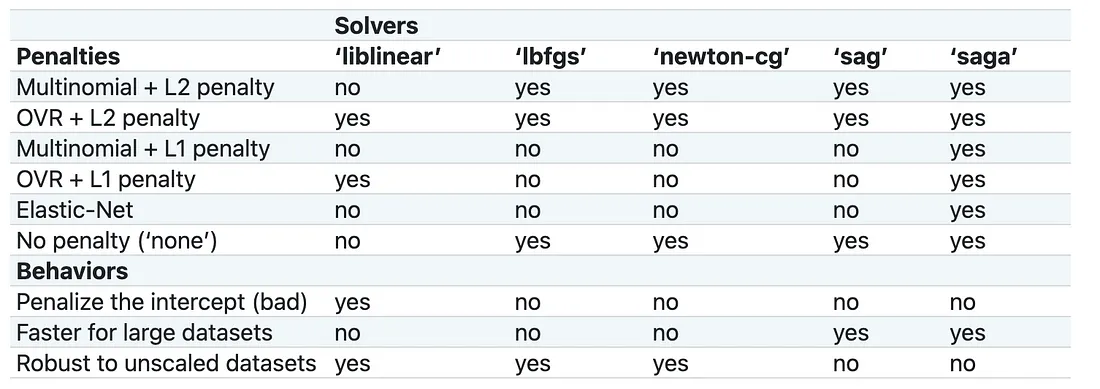

Se planea probar los algoritmos sag (Ya que se desempeña bien con muchos datos y muchas features). Sin saga (Util para sets de datos muy grandes pero sag encaja mejor en el proposito). Se omite newton-cg por ser computacionalmente costoso. Tampoco se usara lbfgs ya que aveces puede tener problemas de convergencia a una solución. Por ultimo, no se usara liblinear para no crear muchas combinaciones de hiperparametros a probar, ademas, suele ser usado para problemas de clasificación mayor escala y con datos de muchas dimensionalidades.

https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

In [ ]:
param_grid = {
    'estimator__penalty': ['l2'],
    'estimator__C': [2, 3, 4],
    'estimator__solver': ['sag'],
    'estimator__max_iter': [1000]
}
#3 top
#
#,{
#    'estimator__penalty': [None],
#    'estimator__solver': ['sag'],
#    'estimator__max_iter': [1000]
#}
#]

In [ ]:
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, average='macro')

In [ ]:
#Ahora se construye la busqueda de los hiperparametros indicando que use todos los procesadores
#disponibles y que divida los datos de entrenamienten 5 pedazos. Adicionalmente se busca optimimzar
#el f1 score

gs_lr_tfidf = GridSearchCV(lr, param_grid,
                            cv=3, scoring=f1_scorer, n_jobs=1)

In [ ]:
  #Busqueda de los hiperparametros y entrenamiento del mejor modelo
gs_lr_tfidf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(random_state=0)),
             n_jobs=1,
             param_grid={'estimator__C': [2, 3, 4],
                         'estimator__max_iter': [1000],
                         'estimator__penalty': ['l2'],
                         'estimator__solver': ['sag']},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
#Mejores parametros entre los explorados
gs_lr_tfidf.best_params_

{'estimator__C': 3,
 'estimator__max_iter': 1000,
 'estimator__penalty': 'l2',
 'estimator__solver': 'sag'}

In [ ]:
#Mejor estimador
lr_final = gs_lr_tfidf.best_estimator_
#Calculo de predicciones sobre los datos de entrenamiento y prueba
y_pred_train = lr_final.predict(x_train)
y_pred_test = lr_final.predict(x_test)

In [ ]:
#Mejor promedio entre las 3 validaciones de f1 score
gs_lr_tfidf.best_score_

0.4314801008365647

In [ ]:
#Metricas de predicciones vs originales
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.97      0.90      0.94       635
           2       0.94      0.89      0.91       912
           3       0.91      0.87      0.89      1223
           4       0.88      0.87      0.87      1576
           5       0.87      0.95      0.91      1897

    accuracy                           0.90      6243
   macro avg       0.92      0.90      0.90      6243
weighted avg       0.90      0.90      0.90      6243

              precision    recall  f1-score   support

           1       0.50      0.39      0.44       154
           2       0.44      0.34      0.38       248
           3       0.38      0.35      0.36       330
           4       0.40      0.39      0.39       387
           5       0.55      0.72      0.62       442

    accuracy                           0.47      1561
   macro avg       0.46      0.44      0.44      1561
weighted avg       0.46      0.47      0.46      1561



En las tablas anteriores se pueden observar las metricas sobre los clasificadores que componen el clasificador de uno contra el resto (determinan si un registro es de una clase o es de alguna otra). Se puede destacar que se obtuvo un f1-score de 0.47. Esto no es bueno ni malo, es regular. Este puntaje es la media de los f1-scores individuales de cada clasificador de uno contra el resto. El f1-score corresponde a una media armonica entre la precisión y el recall. La precisión es un porcentaje de cuantas se acertaron entre todas las marcadas como dicha clase. El recall es un porcentaje de cuantas se acertaron entre todas las que verdaderamente eran de esa clase.

Se puede observar que el 72% de las que verdaderamente eran una calificación de 5, fueron acertadas. Esto no es excelente pero es bueno porque con el clasificador se puede ver que caracterizan las reseñas de calificación 5 y poder ver los factores en la experiencia de los clientes que influyen en lograr esta calificación. De esta forma se puede lograr el objetivo de ver que hace a los sitios turisticos atractivos. Entre todos los marcados como 5, se acerto el 55%, lo cual es regular puesto que el modelo podria estar marcando muchos datos de otra clase como de la suya. No obstante, como se vera más adelante, estos falsos positivos podrian corresponder a clases cercanas como 4, que tambien indican satisfacción. De esta forma se puede mantener que se pueden caracterizar los sitios atractivos.

Los clasificadores de la clase 1 a la clase 4 tienen un recall menor a 0.39, lo cual se podria considerar malo puesto que solo esta reconociendo cerca del 40% de los datos que verdaderamente esa calificación. De la misma manera ocurre con la precisión, las precisiones de estas clases son menores del 50%, osea aciertan la mitad de lo que marcan como de esa clase lo cual se podria comparar con el azar. No obstante, como se vera más adelante, y como ya se menciono previamente, los malos resultados pueden ser atribuidos a la cercania entre 2 clases. Como por ejemplo la clase 1 y 2 que ambas indican mala calificación, por esto pueden tener caracteristicas similares y causar confusión en el modelo y en la clasificación.

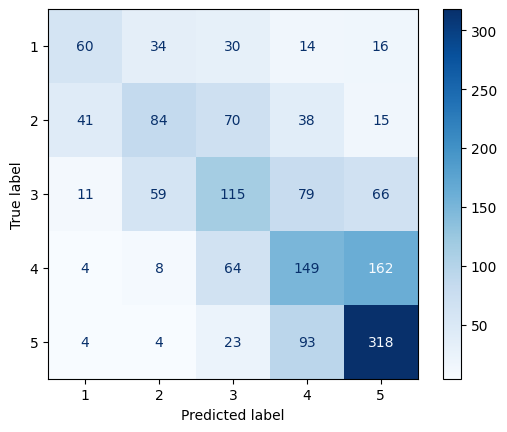

In [ ]:
#Matriz de confusión para ver como se distribuyen los datos de prueba en las clases
# y la cantidad de aciertos y errores
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_final.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

En la matriz de confusión no se ven resultados tan negativos como los descritos previamente en las metricas. Esto se debe a que se ve con mayor oscuridad la diagonal de arriba-izquierda a abajo-derecha. En cuanto más oscuras estos cuadrados, indica que se acertaron más valores de esas clases y mejor sera el modelo. Estos cuadrados de la diagonal se les llama la cantidad de verdaderos positivos. Puesto que se clasificaron como esa clase y en realidad si son de esa clase. No obstante, puede que la diagonal no este tan oscura pero se puede observar que la diagonal junto con los cuadrados arriba y abajo de cada cuadrado de esta son más oscuros con respecto al resto de la matriz. Por lo que se puede ver como los errores (falsos positivos o falsos negativos), que se representan como todas las cajas diferentes a las de la diagonal mencionada, son en su mayoria vecinos a los cuadrados de verdaderos positivos. Lo anterior implica que la mayoria de los errores que ocurrieron fueron en clases cercanas a la verdadera. En la mayoria de clasificadores viendo las filas, osea por true label se pueden ver los falsos negativos en las clases vecinas a la izquierda y derecha de el verdadero positivo. Para la clase 1 y 5 se puede ver que los falsos negativos estan en las 2 clases vecinas.

Con todo esto en cuenta, se puede decir que el modelo puede distinguir que es una buena experiencia y que es una mala. Puesto que se acerca a clases similares asi falle. Se observa como la clase 1 (terrible) experiencia los errores son principalemente con la clase 2. En la clase 4, se ve como los errores son principalmente con la clase 5. Entonces, se podria decir que para las clases cercanas se le dificulta distinguir que clase es la correcta ya que pueden representar cosas similares 1 = terrible y 2 = malo. Esto puede ocurrir por la existencia de palabras negativas comunes entre ambas clases lo cual lleva al error de clasificación.

Las razones por las cuales esto pudo ocurrir podrian ser:
1. La similitud entre las clases o su cercania.
2. La falta de datos de algunas clases que si se tuvieran más datos, se pudo haber hallado más factores diferenciadores y caracteristicos de esa clase.

No obstante, se pueden ver las clases mayores a 3 y menores a 3 y asi cumplir con el objetivo del negocio de caracterizar los malos sitios turisticos y los buenos basandose en las palabras usadas para clasificar y sus importancias. Esto significa que es posible que si se entrenara un modelo binario, se podrian obtener mejores resultados y ver con claridad las caracterizaciones. Aunque, eso incumpliria con el objetivo de negocio de tener un mecanismo automatico que califique un sitio en base a un texto.

Con la caracterización y con el mecanismo que califique sitios turisticos se podra cumplir con el objetivo de negocio de ver oportunidades de mejora. Puede que no sea muy preciso el mecanismo automatico pero se acercara a las calificaciones reales por un punto en la mayoria de casos como se observa en la matriz.

In [ ]:
#Mostrar para cada subclasificador las variables explicativas (palabras) más significativas
#y como afectan la selección
for i, clf in enumerate(lr_final.estimators_):
  coefs = clf.coef_.flatten()
  coefsSign = coefs / abs(coefs)
  coefs = abs(coefs)
  top_indices = coefs.argsort()[-20:]
  top_features = lr_final.estimators_[i].feature_names_in_[top_indices]
  class_data = pd.DataFrame({'feature': top_features, 'coefficient': coefs[top_indices], 'sign': coefsSign[top_indices]})
  print("####################" + str(lr_final.classes_[i]) + "####################")
  print(class_data)
  print()

####################1####################
                feature  coefficient  sign
0                cereal     2.394113  -1.0
1                resena     2.468939   1.0
2          interminable     2.493534   1.0
3              realista     2.496400  -1.0
4                limpie     2.565205   1.0
5             asignaran     2.579231   1.0
6              desperto     2.663956  -1.0
7              conducto     2.945793   1.0
8         precolombiano     3.037566   1.0
9   arquitecronicamente     3.152400   1.0
10                labor     3.287006  -1.0
11        preciocalidad     3.296318   1.0
12             empapado     3.332861  -1.0
13              picante     3.336935   1.0
14           guardaropa     3.873293   1.0
15              vayasma     4.399727  -1.0
16              ustedma     4.406628   1.0
17               tallir     4.458524   1.0
18       desplazamiento     5.184433  -1.0
19              reclame     5.314021   1.0

####################2####################
            

<ipython-input-89-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-89-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-89-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-89-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-89-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)


Anteriormente, se pueden ver 5 tablas con las palabras que más influenciaban cada clasificador. En estas tablas se puede ver la fuerza que ejercian sobre las clasificaciones. Adicionalmente, se puede ver la dirección del efecto, los negativos llevaban a la clase negativa (osea que no es de esa clase que estaba identificando el clasificador), los positivos llevaban a la clase positiva (la clase del clasificador). Esto se ve claramente ya que en la formula vista previamente, en la expresión lineal, si el coeficiente es positivo, cada que crece esa variable explicativa, más crecera la probabilidad de la clase positiva y probablemente el dato sea clasificado como esta. Si es negativo, al crecer la variable, decrecera la probabilidad y probablemente esa entrada sea clasificada como otra clase. De esta forma, viendo los positivos y de mayor coeficiente, podemos ver las que más influencian la clase a estudiar. Este analisis se hara en la parte cualitativa donde se observaran los conceptos principales que caracterizan cada clase.

Aun asi se puede ver como hay palabras que en las clases buenas (4 y 5) tienen un efecto positivo mientras que en las clases bajas (1,2 y 3) tienen efecto negativo, respaldando la separación entre bueno y malo mencionada previamente.

## Selección del mejor modelo

Al momento de seleccionar el mejor modelo de los 3 que se realizaron, utilizando árboles de decisión, Naive Bayes y regresión logística, una buena forma de comparar la calidad de los modelos es con el F1 score. Este métrica representa la precisión y exhaustividad del modelo en una sola medida, lo que lo hace útil para evaluar el equilibrio entre falsos positivos y falsos negativos. Un F1 score más alto indica un mejor equilibrio entre precisión y exhaustividad, lo que significa que el modelo tiene un mejor rendimiento general en la clasificación.

En cuanto a los F1 scores obtenidos para cada modelo, fueron 0.33 para árboles de decisión, 0.29 para Naive Bayes y 0.47 para regresión logística, tal y como se puede ver en las secciones anteriores. A partir de estos resultados, se determina que el modelo de regresión logística es el más efectivo, ya que alcanzó el F1 score más alto entre los tres algoritmos evaluados. Esto sugiere que la regresión logística logró un mejor equilibrio entre precisión y exhaustividad en la clasificación de los datos en comparación con los otros dos modelos, por lo que podemos decir que este es nuestro mejor modelo.

# Resultados (20%)

In [ ]:
#Mostrar para cada subclasificador las variables explicativas (palabras) más significativas
#y como afectan la selección
for i, clf in enumerate(lr_final.estimators_):
  coefs = clf.coef_.flatten()
  coefsSign = coefs / abs(coefs)
  coefs = abs(coefs)
  top_indices = coefs.argsort()[-20:]
  top_features = lr_final.estimators_[i].feature_names_in_[top_indices]
  class_data = pd.DataFrame({'feature': top_features, 'coefficient': coefs[top_indices], 'sign': coefsSign[top_indices]})
  print("####################" + str(lr_final.classes_[i]) + "####################")
  print(class_data)
  print()

####################1####################
                feature  coefficient  sign
0                cereal     2.394113  -1.0
1                resena     2.468939   1.0
2          interminable     2.493534   1.0
3              realista     2.496400  -1.0
4                limpie     2.565205   1.0
5             asignaran     2.579231   1.0
6              desperto     2.663956  -1.0
7              conducto     2.945793   1.0
8         precolombiano     3.037566   1.0
9   arquitecronicamente     3.152400   1.0
10                labor     3.287006  -1.0
11        preciocalidad     3.296318   1.0
12             empapado     3.332861  -1.0
13              picante     3.336935   1.0
14           guardaropa     3.873293   1.0
15              vayasma     4.399727  -1.0
16              ustedma     4.406628   1.0
17               tallir     4.458524   1.0
18       desplazamiento     5.184433  -1.0
19              reclame     5.314021   1.0

####################2####################
            

<ipython-input-90-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-90-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-90-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-90-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)
<ipython-input-90-7b1f3dab0bc8>:5: RuntimeWarning: invalid value encountered in divide
  coefsSign = coefs / abs(coefs)


Para hacer el analisis cualitativo del mejor modelo y ver la información que se puede extraer de los modelos, con el fin de cumplir con los objetivos del negocio, se haran analisis sobre las palabras que fueron más relevantes sobre la elección de cada clase dentro del clasificador desarollado.

Calificación 1:

Para esta primera clase que representa una terrible experiencia en el sitio turistico. Entre las palabras influyentes para elegir esta clase, la de mayor incidencia e influencia en que una reseña se marcara como 1 fue "reclame", que probablemente se refiere a la necesidad de realizar reclamos dentro del sitio turistico. Esto indica necesidades o estandares no cumplidos para los visitantes. Por esto esta palabra puede representar que por defecto no se estaban cumpliendo los servicios para los clientes y hubo la necesidad de realizar reclamos que no sabemos si fueron atendidos o no. Otra palabra que aportaba a la selección de esta clase es "guardaropa" es posible que los visitantes tengan algun tipo de conflicto o problema con este servicio y que deberia ser revisado para garantizar la satisfacción de los clientes. Otra palabra a destacar entre las más influenciantes es "limpie", lo cual puede indicar alguna situación comun que se este presentando con la limpieza de los sitios. Por ultimo, se puede resaltar "interminable", lo cual puede referirse a esperas o aburrimiento durante algun tipo de servicio ofrecido por el sitio turistico.

Calificación 2:

Para esta calificación que denota tambien un mal servicio se pueden resaltar multiples aspectos. Primero que todo, se nota como una de las palabras con mayor incidencia es "champan" lo que puede indicar algun problema con los licores dentro del sitio turistico y que debe ser revisado para la satisfacción del cliente. Otra palabra es "conciergir" que puede referirse a los concerjes o concierges del sitio turistico los cuales pueden haber prestado mal servicio en las instalaciones, en la orientación o en la reserva y planeación de servicios. Otra palabra observada es "irrito" lo cual indica irritación por parte del cliente por molestias dadas o problemas de actitud en el lado de los empleados. Otra palabra a mencionar es "trabada" lo que puede señalar algun mal funcionamiento de algun equipo en las atracciones o demoras en algun servicio.

Calificación 3:

En la calificación 3, se suele indicar un servicio mediocre o regular pero ni bueno o ni malo. Se puede destacar la palabra "ayudara" que puede indicar o la falta de alguien que resolucione problemas o que a pesar de que hubo algun inconveniente alguien colaboro en la resolución. Otra palabra es "cordero" lo que puede indicar situaciones no esperadas con la comida o con algun animal en una atracción turistica.  Aparte de estas palabras, es dificil determinar alguna otra observación ya que al ser un nivel medio, no queda claro si una palabra indica algo positivo o negativo en el sitio turistico. Ejemplos de esto es "popularidad", "parroquia" o "promocionar".

Calificación 4:

Esta calificación indica algo que fue bueno, no excelente pero bueno. Entre las palabras más influyentes, se observa "cocer", esta puede indicar satisfacción con algun servicio de costureria que le fue util a algun cliente. Otra palabra que se observa es "choriso" lo cual puede indicar algun tipo de satisfacción con esta comida dentro del sitio turistico. Se notan tambien algunas palabras que alejan la reseña de la calificación de 4 que se presentaban en otras calificaciones inferiores, una de estas es "guardaropa", lo que valida el valor negativo de este aspecto en la calificación de 1. Una ultima palabra a mencionar que afecto positivamente es "paleta" lo cual puede referirse al alimento y la satisfacción de los clientes sobre este producto.

Calificación 5:

Esta calificación un servicio excelente y de la mayor satisfacción generada sobre el cliente. En esta calificación se pueden observar algunas palabras que alejaban de puntuaciones más bajas pero que aca se observa que acercan a este nivel de satisfacción. Un ejemplo de esto es "desplazamiento", es posible que esto se refiere a la falta de este y que los servicios son cercanos entre si dentro de un sitio turistico o que el sitio ofrece desplazamiento entre localizaciones. Otra palabra que tiene esta calificación es "ciclismo", lo que indica que los sitios turisticos que ofrecen alquiler o espacios para esta actividad suelen satisfacer a los clientes. Una palabra que aporta a la calificación de 5 es "cereal" lo que puede indicar la disponibilidad de este producto o alimento y la satisfacción gracias a este. Una ultima palabra a mencionar es "representante" que puede referirse a la existencia, disponibilidad o satisfacción con los representantes dentro del sitio turistico que pueden guiar, ayudar o hasta proveer los servicios ofrecidos.



En base a la información obtenida se pueden tomar multiples estrategias por parte de la organización para mejorar los hoteles, aumentar su popularidad y fomentar el turismo.

1. Hacer revisión de los servicios de limpieza en los hoteles. Esto se debe garantizar en base a la influencia de este componente en las calificaciónes negativas.
2. Mejorar la atención ante reclamos y mejorar las ayudas que provee el hotel ante inquietudes o problemas que tienen los visitantes. Esto se debe realizar ya que las ayudas pueden mejorar la experiencia de los visitantes ya que sus inconvenientes son solucionados y se evitan reclamos repetitivos o incomodidades.
3. Realizar evaluación de la eficiencia de los procesos y la calidad del entretenimiento ya que la palabra "interminable" destacó. Por esto se puede revisar opiniones sobre el entretenimiento y los tiempos promedios en los servicios y tomar medidas en el caso de que estos no sean satisfactorios.
4. Establecer o revisar la presencia y calidad de los representantes o concierge. Esto se hace como consecuencia a que se vieron problemas con el termino "concierge" y positividad con "representante". Es fundamental mejorar estos personajes que ofrecen servicios y facilitan la consolidación de las expectativas de los visitantes, ademas de ayudar y proveer orientación a los mismos.
5. Implementar o evaluar servicios clave observados. Entre estos servicios se observo el ciclismo, por lo que se puede ofrecer clases, espacios o alquiler de equipo de esta diciplina. Tambien, se pueden ofrecer servicios de desplazamiento a lugares turisticos desde el hotel o hacia terminales de transporte. Estos 2 servicios podrian mejorar la satisfacción de los visitantes basandonos en lo observado.
6. Ampliación y revisión de los servicios alimenticios. Se puede proponer esta actividad como resultado de la positividad que aportaron a la calificación los alimentos como el chorizo, las paletas y los cereales. Incluir estos componentes, y proveerlos con calidad pueden mejorar la satisfacción en los clientes. Si estos ya estan presentes, entonces se puede revisar la calidad como puede ser con los licores, ya que la champagne fue marcada como algo negativo, por lo que hay que buscar proveer calidad en este producto.
7. Evaluación de los guardaropas. Se debe revisar este servicio, tanto en los closets de las habitaciones como el servicio de almacenamiento de prendas en eventos. La razón por la cual se debe evaluar es el que este termino fue marcado como algo negativo.
8. Evaluación de empleados. Se vio que la irritación fue algo negativo que fue resaltado por el modelo. Por esto mismo se debe revisar la actitud de los empleados en caso de que esten teniendo poca paciencia con los clientes y causandoles disgusto. Por otra parte, tambien se debe evaluar el desempeño de estos y la calidad de sus trabajos para evitar la irritación de los clientes.

Con esta información y estrategias, se puede concluir que la organización podra tanto mejorar sus hoteles, ser más populares y mejorar la percepción de los clientes. Todo esto resultaria en mayor flujo de clientes, y claramente, beneficios economicos que pueden ayudar a crecer la organización, lo que beneficia a los stakeholders. Adicionalmente, con todos los descubrimientos, la dirección se acerca a lograr sus objetivos de caracterización de aspectos atractivos/positivos y negativos con el fin de tomar estrategias de mejoria. Los equipos de los hoteles podran mejorar la calidad de su trabajo con retroalimentación. El area de control de calidad podra identificar y solucionar problemas sobre los servicios. El area de marketing puede tomar inspiración de la información para promocionar y hacer atractivos los hoteles. El departamento de TI tendra el despliegue de la herramienta para determinar calificaciones de sitios por parte de clientes, aunque con poca precisión como se vio en el analisis de las metricas del modelo. Por ultimo, los clientes se beneficiaran de un mejor servicio y de la mejoria de las experiencias.

# Etiquetar particion de prueba


In [ ]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('tipo1_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')


In [ ]:
# Cargar el archivo de datos
data = pd.read_csv("particion_prueba_estudiantes.csv", sep=',', encoding = 'utf-8')
data_og = data.copy()

In [ ]:
# Preprocesamiento
# Funciones de limpieza y preprocesamiento
stop_words_spanish = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') if word is not None else None for word in words]

def to_lowercase(words):
    return [word.lower() for word in words]

def remove_punctuation(words):
    return [re.sub(r'[^\w\s]', '', word) if word is not None else None for word in words]

def replace_numbers(words):
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in words if not any(char.isdigit() for char in word)]

def remove_stopwords(words):
    return [word for word in words if word not in stop_words_spanish]

def remove_accidentals(words):
    replacements = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u'}
    return [''.join(replacements[char] if char in replacements else char for char in word) for word in words]

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

# Tokenización y lematización
data['Review'] = data['Review'].apply(contractions.fix)
data['words'] = data['Review'].apply(word_tokenize)
data['words'].dropna()
data['words'] = data['words'].apply(preprocessing)

nlp = spacy.load("es_core_news_sm")
def lemmatize_verbs(words):
    doc = nlp(" ".join(words))
    return [token.lemma_ for token in doc]

data['words'] = data['words'].apply(lemmatize_verbs)
data['words'] = data['words'].apply(remove_accidentals)
data['words'] = data['words'].apply(lambda x: ' '.join(map(str, x)))

# Eliminación de espacios extra
for index, row in data.iterrows():
    data.loc[index, 'words'] = re.sub(r'\s+', ' ', row['words'])

# Creación de matriz TF-IDF
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(data['words'])

# Integración de las etiquetas
data_new = pd.DataFrame(X_tf_idf.toarray(), columns=tf_idf.get_feature_names_out())

# Eliminación de filas duplicadas
# data_new = data_new.drop_duplicates()


In [ ]:
del data

In [ ]:
# ordena correctamente los features
data_new = data_new.reindex(columns=lr_final.feature_names_in_)

In [ ]:
# Replaces Nan values from refit  with 0

data_new.fillna(0, inplace=True)


In [ ]:
# Get the features present in the training data but not in the test data
missing_features = set(data_prep.columns) - set(data_new.columns)

# Get the features present in the test data but not in the training data
extra_features = set(data_new.columns) - set(data_prep.columns)

In [ ]:
# Add the missing features to the test data with a default value (e.g., 0)
for feature in missing_features:
    data_new[feature] = 0

In [ ]:
# Drop the extra features from the test data
data_new.drop(columns=extra_features, inplace=True)

In [ ]:
# Ensure that the data types of the features in the test data match those in the training data
for feature in data_prep.columns:
    data_new[feature] = data_new[feature].astype(data_prep[feature].dtype)

In [ ]:
# remove the class column from data_new

data_new = data_new.drop('Class', axis=1)


In [ ]:
# normalize all rows in the dataframe agian

data_new = data_new.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)


In [ ]:
# Etiquetar los datos usando el mejor modelo entrenado
data_og['Class'] = lr_final.predict(data_new)

# Exportar el archivo con datos etiquetados
data_og.to_csv("particion_prueba_estudiantes_etiquetado.csv", index=False)

In [ ]:
# imprime la distribucion de las etiqutas class

data_og['Class'].value_counts().to_frame().reset_index().rename(columns={'index':'Class', 'Class':'Count'})


,Count,count
0,5,900
1,3,399
2,4,300
3,1,80
4,2,71
